In [1]:
import sys
sys.path.append('c:\\Users\\Admin\\few_shot_learning\\')

from Utils.Class import Predictor, FSL, Random, Nearest_Neighbour
from Utils.saveLoad import save_data, load_data
from Utils import preprocess, testModels, buildModel, utils

import numpy as np
import os
import random

from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split

INFO:tensorflow:Enabling eager execution
INFO:tensorflow:Enabling v2 tensorshape
INFO:tensorflow:Enabling resource variables
INFO:tensorflow:Enabling tensor equality
INFO:tensorflow:Enabling control flow v2


In [17]:
import copy

# split the dataset into training and testing -> 20/30 of the classes will be used for testing
with open(r'data\airplane\fgvc-aircraft-2013b\data\util\military_families.txt', 'r') as f:
    train_imgs_dir = {}
    test_imgs_dir = {}

    NUM_TRAIN = 20
    count = 0
    for line in f.readlines():
        if count < NUM_TRAIN:
            train_imgs_dir.update({line.strip() : []})
        else:
            test_imgs_dir.update({line.strip() : []})
        count += 1

print(train_imgs_dir.keys())
print(test_imgs_dir.keys())

dict_keys(['ATR-42', 'ATR-72', 'An-12', 'BAE-125', 'Beechcraft 1900', 'Cessna 172', 'Cessna 208', 'Challenger 600', 'DC-3', 'DC-9', 'DH-82', 'DHC-1', 'DHC-6', 'Dornier 328', 'EMB-120', 'Embraer ERJ 145', 'Eurofighter Typhoon', 'F-16', 'F/A-18', 'C-130'])
dict_keys(['C-47', 'Hawk T1', 'Il-76', 'King Air', 'PA-28', 'Saab 2000', 'Spitfire', 'Tornado', 'Tu-134', 'Tu-154'])


In [18]:
with open(r'data\airplane\fgvc-aircraft-2013b\data\util\images_family_train.txt', 'r') as f:
    for line in f.readlines():
        img_fn = r'data\airplane\fgvc-aircraft-2013b\data\images\{}.jpg'.format(line[:7])
        model = line[8:].strip()
        
        if model in train_imgs_dir:
            
            train_imgs_dir[model].append(img_fn)

        elif model in test_imgs_dir:
            test_imgs_dir[model].append(img_fn)

with open(r'data\airplane\fgvc-aircraft-2013b\data\util\images_family_test.txt', 'r') as f:
    for line in f.readlines():
        img_fn = r'data\airplane\fgvc-aircraft-2013b\data\images\{}.jpg'.format(line[:7])
        model = line[8:].strip()
        
        if model in train_imgs_dir:
            
            train_imgs_dir[model].append(img_fn)

        elif model in test_imgs_dir:
            test_imgs_dir[model].append(img_fn)


with open(r'data\airplane\fgvc-aircraft-2013b\data\util\images_family_val.txt', 'r') as f:
    for line in f.readlines():
        img_fn = r'data\airplane\fgvc-aircraft-2013b\data\images\{}.jpg'.format(line[:7])
        model = line[8:].strip()
        
        if model in train_imgs_dir:
            
            train_imgs_dir[model].append(img_fn)

        elif model in test_imgs_dir:
            test_imgs_dir[model].append(img_fn)


In [23]:
print('model num_samples')
for k in train_imgs_dir.keys():
    print(k, len(train_imgs_dir[k]))

print('\nmodel num samples')
for k in test_imgs_dir.keys():
    print(k, len(test_imgs_dir[k]))

model num_samples
ATR-42 100
ATR-72 100
An-12 100
BAE-125 100
Beechcraft 1900 100
Cessna 172 100
Cessna 208 100
Challenger 600 100
DC-3 100
DC-9 100
DH-82 100
DHC-1 100
DHC-6 100
Dornier 328 100
EMB-120 100
Embraer ERJ 145 200
Eurofighter Typhoon 100
F-16 100
F/A-18 100
C-130 100

model num samples
C-47 100
Hawk T1 100
Il-76 100
King Air 100
PA-28 100
Saab 2000 100
Spitfire 100
Tornado 100
Tu-134 100
Tu-154 100


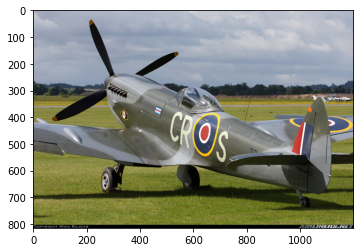

In [47]:
img = plt.imread(train_imgs_dir['Spitfire'][0])
plt.imshow(img)

In [24]:
X_train, Y_train = preprocess.get_all_X_Y(train_imgs_dir, desired_ratio=1.4, width=280, height=200, crop_bottom=20)

0
200
400
600
800
1000
1200
1400
1600
1800
2000


In [25]:
X_test, Y_test = preprocess.get_all_X_Y(test_imgs_dir, desired_ratio=1.4, width=280, height=200, crop_bottom=20)

0
200
400
600
800


In [26]:
save_data(path='D://', X_train=X_train, Y_train=Y_train)
save_data(path='D://', X_test=X_test, Y_test=Y_test)

saving data...
saved X_train to /D://X_train.h5!
saved Y_train to /D://Y_train.h5!
saving data...
saved X_test to /D://X_test.h5!
saved Y_test to /D://Y_test.h5!
